# Eliminación de nodos en Árboles B

La eliminación de nodos en los Árboles B es un proceso delicado que asegura que el árbol siga cumpliendo con sus propiedades fundamentales después de la eliminación. Los Árboles B son estructuras de datos de tipo árbol que generalizan los Árboles Binarios de Búsqueda (ABB), permitiendo que un nodo tenga más de dos hijos. Esto los hace especialmente útiles para sistemas que requieren lecturas y escrituras de grandes volúmenes de datos en almacenamiento secundario, como bases de datos y sistemas de archivos.

## Proceso de Eliminación

Eliminar un nodo en un Árbol B implica varios pasos para mantener las propiedades del árbol. A continuación, describimos los pasos generales involucrados:

- **Buscar el nodo a eliminar:** Primero, se debe buscar el nodo que contiene el valor a eliminar, comenzando desde la raíz y avanzando hacia las hojas, eligiendo el hijo adecuado basado en el valor de las claves.
- **Eliminar el nodo:**
  - Si el nodo es una **hoja**, simplemente se elimina la clave del nodo.
  - Si el nodo es **interno**, se pueden seguir dos estrategias:
    - **Sustitución por predecesor:** Reemplazar la clave a eliminar con su predecesor inmediato (la máxima clave del subárbol izquierdo).
    - **Sustitución por sucesor:** Reemplazar la clave a eliminar con su sucesor inmediato (la mínima clave del subárbol derecho).
- **Rebalancear el árbol:** Después de la eliminación, si algún nodo viola las propiedades de los Árboles B (como tener menos claves de las permitidas), se debe rebalancear el árbol. Esto puede implicar:
  - **Fusionar nodos:** Si un nodo y su hermano tienen menos claves de las permitidas, se pueden fusionar en un solo nodo.
  - **Redistribuir claves:** Si un nodo tiene menos claves de las permitidas, pero un hermano tiene más de las mínimas requeridas, se pueden redistribuir las claves entre ellos.

## Implementación en Python

In [13]:
# Código utilitario
from src.visualization import visualize_b_tree
# ver src/BTree.py
from src.BTree import BTree

In [14]:
# Método para eliminar una llave del árbol
def delete(self, k):
    # Comenzar la eliminación por la raíz
    node = self.root
    self._delete_internal(node, k)

    # Si después de eliminar, la raíz está vacía y no es hoja, hacemos que su
    # primer hijo sea la nueva raíz.
    if len(self.root.keys) == 0 and not self.root.leaf:
        self.root = self.root.children[0]
    print(f"Llave {k} eliminada.")

# Método interno para manejar la eliminación en un nodo específico
def _delete_internal(self, node, k):
    t = self.t  # Mínimo grado del árbol B
    i = 0

    # Buscar la posición de la llave a eliminar o la posición del hijo donde
    # buscarla
    while i < len(node.keys) and k > node.keys[i]:
        i += 1

    # El nodo contiene la llave a eliminar
    if i < len(node.keys) and k == node.keys[i]:
        if node.leaf:  # Caso 1: El nodo es una hoja
            # Simplemente removemos la llave del nodo
            node.keys.pop(i)
            return
        else:  # Caso 2: El nodo no es una hoja
            # Hay que realizar una eliminación más compleja
            return self._delete_non_leaf(node, i)
    else:
        if node.leaf:  # Caso 3: No encontramos la llave y hemos llegado a una hoja
            # La llave no se encuentra en el árbol
            print(f"Llave {k} no encontrada para eliminar.")
            return
        # La llave no está en este nodo y no es una hoja, continuamos buscando
        # en los hijos
        flag = (i == len(node.keys))
        if len(node.children[i].keys) < t:
            # Asegurarnos de que el hijo tenga suficientes llaves antes de
            # descender
            self._fill(node, i)
        # Establecer la nueva ruta hacia dónde debemos seguir buscando
        if flag and i > len(node.keys):
            self._delete_internal(node.children[i - 1], k)
        else:
            self._delete_internal(node.children[i], k)

# Método para eliminar una llave que no se encuentra en una hoja
def _delete_non_leaf(self, node, i):
    # Llave que queremos eliminar
    k = node.keys[i]
    t = self.t  # Mínimo grado del árbol B

    # Caso 2a: Si el hijo previo tiene suficientes llaves, encontrar el
    # predecesor y eliminar
    if len(node.children[i].keys) >= t:
        pred = self._get_pred(node, i)
        node.keys[i] = pred
        self._delete_internal(node.children[i], pred)
    # Caso 2b: Si el hijo siguiente tiene suficientes llaves, encontrar el
    # sucesor y eliminar
    elif len(node.children[i + 1].keys) >= t:
        succ = self._get_succ(node, i)
        node.keys[i] = succ
        self._delete_internal(node.children[i + 1], succ)
    else:
        # Caso 2c: Si ambos hijos tienen menos llaves que el mínimo, fusionarlos
        # y eliminar la llave
        self._merge(node, i)
        self._delete_internal(node.children[i], k)

# Método para obtener el predecesor de una llave en un nodo
def _get_pred(self, node, i):
    # Continuar moviéndose al hijo más a la derecha hasta llegar a una hoja
    cur = node.children[i]
    while not cur.leaf:
        cur = cur.children[-1]
    # El último elemento en una hoja será el predecesor
    return cur.keys[-1]

# Método para obtener el sucesor de una llave en un nodo
def _get_succ(self, node, i):
    # Continuar moviéndose al hijo más a la izquierda hasta llegar a una hoja
    cur = node.children[i + 1]
    while not cur.leaf:
        cur = cur.children[0]
    # El primer elemento en una hoja será el sucesor
    return cur.keys[0]

# Método para asegurarse de que el hijo con menos de t-1 llaves tenga
# suficientes para eliminar
def _fill(self, node, i):
    t = self.t  # Mínimo grado del árbol B

    # Determinar si podemos tomar prestada una llave del hermano anterior
    if i != 0 and len(node.children[i - 1].keys) >= t:
        self._borrow_from_prev(node, i)
    # O determinar si podemos tomar prestada una llave del hermano siguiente
    elif i != len(node.keys) and len(node.children[i + 1].keys) >= t:
        self._borrow_from_next(node, i)
    else:
        # Si no hay llaves suficientes para tomar prestadas, fusionar con un
        # hermano
        if i != len(node.keys):
            self._merge(node, i)
        else:
            self._merge(node, i - 1)

# Método para tomar prestada una llave del hermano anterior
def _borrow_from_prev(self, node, i):
    child = node.children[i]
    sibling = node.children[i - 1]

    # Mover la última llave del hermano previo al padre y mover una llave del
    # padre al hijo
    child.keys.insert(0, node.keys[i - 1])
    if not child.leaf:
        # Si no es hoja, también mover el hijo correspondiente
        child.children.insert(0, sibling.children.pop())
    # Actualizar la llave del padre con la última llave del hermano previo
    node.keys[i - 1] = sibling.keys.pop()

# Método para tomar prestada una llave del hermano siguiente
def _borrow_from_next(self, node, i):
    child = node.children[i]
    sibling = node.children[i + 1]

    # Mover la primera llave del hermano siguiente al padre y mover una llave
    # del padre al hijo
    child.keys.append(node.keys[i])
    if not child.leaf:
        # Si no es hoja, también mover el hijo correspondiente
        child.children.append(sibling.children.pop(0))
    # Actualizar la llave del padre con la primera llave del hermano siguiente
    node.keys[i] = sibling.keys.pop(0)

# Método para fusionar dos hijos de un nodo
def _merge(self, node, i):
    child = node.children[i]
    sibling = node.children[i + 1]

    # Mover la llave del nodo junto con las llaves del hermano siguiente al hijo
    # actual
    child.keys.append(node.keys.pop(i))
    child.keys += sibling.keys
    if not child.leaf:
        # Si no son hojas, combinar los hijos también
        child.children += sibling.children
    # Eliminar la referencia al hermano que se ha fusionado
    node.children.pop(i + 1)

# Extender la clase BTree con el nuevo método
BTree.delete = delete
BTree._delete_internal = _delete_internal
BTree._get_pred = _get_pred
BTree._get_succ = _get_succ
BTree._fill = _fill
BTree._borrow_from_prev = _borrow_from_prev
BTree._borrow_from_next = _borrow_from_next
BTree._merge = _merge

## Pruebas exhaustivas


PRUEBA_INSERCION_Y_ELIMINACION
------------------------------
Nodo BTree inicializado como hoja
Árbol B inicializado con grado mínimo 3

Árbol B con grado mínimo 3
Llave insertada en nodo hoja.
Llave insertada: 10
Llave insertada en nodo hoja.
Llave insertada: 20
Llave insertada en nodo hoja.
Llave insertada: 5
Llave insertada en nodo hoja.
Llave insertada: 6
Llave insertada en nodo hoja.
Llave insertada: 12
Nodo BTree inicializado
Nodo BTree inicializado como hoja
Nodo hijo dividido en dos nodos.
Llave insertada en nodo hoja.
Navegando hacia hijo para continuar inserción.
Llave insertada: 30
Llave insertada en nodo hoja.
Navegando hacia hijo para continuar inserción.
Llave insertada: 7
Llave insertada en nodo hoja.
Navegando hacia hijo para continuar inserción.
Llave insertada: 17
Claves insertadas: [10, 20, 5, 6, 12, 30, 7, 17]


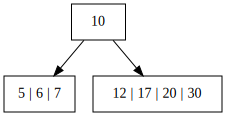

Llave 6 eliminada.
Clave 6 eliminada (prueba de préstamo).
Llave 7 eliminada.
Clave 7 eliminada (prueba de fusión).
Llave 100 no encontrada para eliminar.
Llave 100 eliminada.
Intento de eliminar clave 100 (no existe).
Llave 5 eliminada.
Clave 5 eliminada (prueba de múltiples operaciones).
Llave 12 eliminada.
Clave 12 eliminada (prueba de múltiples operaciones).
Llave 17 eliminada.
Clave 17 eliminada (prueba de múltiples operaciones).
Llave 10 eliminada.
Llave 20 eliminada.
Llave 5 no encontrada para eliminar.
Llave 5 eliminada.
Llave 6 no encontrada para eliminar.
Llave 6 eliminada.
Llave 12 no encontrada para eliminar.
Llave 12 eliminada.
Llave 30 eliminada.
Llave 7 no encontrada para eliminar.
Llave 7 eliminada.
Llave 17 no encontrada para eliminar.
Llave 17 eliminada.
Árbol vaciado.
Nodo BTree inicializado como hoja
Árbol B inicializado con grado mínimo 4

Árbol B con grado mínimo 4
Llave insertada en nodo hoja.
Llave insertada: 10
Llave insertada en nodo hoja.
Llave insertada: 20


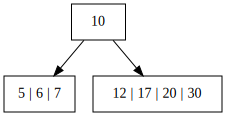

Llave 6 eliminada.
Clave 6 eliminada (prueba de préstamo).
Llave 7 eliminada.
Clave 7 eliminada (prueba de fusión).
Llave 100 no encontrada para eliminar.
Llave 100 eliminada.
Intento de eliminar clave 100 (no existe).
Llave 5 eliminada.
Clave 5 eliminada (prueba de múltiples operaciones).
Llave 12 eliminada.
Clave 12 eliminada (prueba de múltiples operaciones).
Llave 17 eliminada.
Clave 17 eliminada (prueba de múltiples operaciones).
Llave 10 eliminada.
Llave 20 eliminada.
Llave 5 no encontrada para eliminar.
Llave 5 eliminada.
Llave 6 no encontrada para eliminar.
Llave 6 eliminada.
Llave 12 no encontrada para eliminar.
Llave 12 eliminada.
Llave 30 eliminada.
Llave 7 no encontrada para eliminar.
Llave 7 eliminada.
Llave 17 no encontrada para eliminar.
Llave 17 eliminada.
Árbol vaciado.

PRUEBA_ARBOL_VACIO
------------------------------
Nodo BTree inicializado como hoja
Árbol B inicializado con grado mínimo 3

Prueba con árbol vacío
Llave 15 no encontrada para eliminar.
Llave 15 elimin

In [15]:
# Método para probar inserción y eliminación en un árbol B
def prueba_insercion_y_eliminacion():
    # Prueba con diferentes grados para el árbol B
    grados = [3, 4]
    for grado in grados:
        # Crear un nuevo árbol B con el grado especificado
        btree = BTree(grado)
        # Informar del inicio de la prueba con el grado actual
        print(f"\nÁrbol B con grado mínimo {grado}")

        # Insertar claves para tener contenido en el árbol
        claves_para_insertar = [10, 20, 5, 6, 12, 30, 7, 17]
        for clave in claves_para_insertar:
            btree.insert(clave)
        # Mostrar las claves que se insertaron
        print("Claves insertadas:", claves_para_insertar)

        # Visualizar el estado actual del árbol B
        dot = visualize_b_tree(btree.root)
        display(dot)

        # Eliminar una clave y verificar el caso de préstamo simple
        btree.delete(6)
        print("Clave 6 eliminada (prueba de préstamo).")

        # Eliminar otra clave y verificar el caso de fusión
        btree.delete(7)
        print("Clave 7 eliminada (prueba de fusión).")

        # Probar la eliminación de una clave no existente y manejar sin errores
        btree.delete(100)
        print("Intento de eliminar clave 100 (no existe).")

        # Eliminar múltiples claves para probar varios casos de préstamos y
        # fusiones
        for clave in [5, 12, 17]:
            btree.delete(clave)
            print(f"Clave {clave} eliminada (prueba de múltiples operaciones).")

        # Eliminar claves hasta dejar el árbol vacío
        for clave in claves_para_insertar:
            btree.delete(clave)
        print("Árbol vaciado.")

# Método para probar el comportamiento con un árbol B vacío
def prueba_arbol_vacio():
    # Crear un árbol B vacío con grado mínimo 3
    btree = BTree(3)
    print("\nPrueba con árbol vacío")

    # Intentar eliminar una clave de un árbol vacío y manejar sin errores
    btree.delete(15)
    print("Intento de eliminar clave 15 en árbol vacío.")

# Método para probar el comportamiento con un árbol B que tiene solo una clave
def prueba_arbol_una_clave():
    # Crear un árbol B con una sola clave
    btree = BTree(2)
    print("\nPrueba con árbol de una sola clave")

    # Insertar una única clave al árbol
    btree.insert(10)
    # Eliminar la única clave presente en el árbol
    btree.delete(10)
    print("Clave 10 eliminada en árbol de una sola clave.")


# Ejecutar pruebas
print('\nPRUEBA_INSERCION_Y_ELIMINACION')
print('------------------------------')
prueba_insercion_y_eliminacion()

print('\nPRUEBA_ARBOL_VACIO')
print('------------------------------')
prueba_arbol_vacio()

print('\nPRUEBA_ARBOL_UNA_CLAVE')
print('------------------------------')
prueba_arbol_una_clave()

## Complejidad del Algoritmo

- **Complejidad del tiempo:** La eliminación en un Árbol B tiene una complejidad de tiempo promedio de \(O(\log n)\), donde \(n\) es el número de claves en el árbol. Esto se debe a que el proceso de búsqueda, eliminación y rebalanceo se realiza a lo largo de la altura del árbol, que es logarítmica respecto al número de claves.
- **Complejidad del espacio:** La complejidad del espacio de un Árbol B es \(O(n)\), donde \(n\) es el número de claves en el árbol. Sin embargo, la operación de eliminación en sí misma utiliza un espacio adicional constante, por lo que su complejidad espacial es \(O(1)\), excluyendo el espacio ocupado por el árbol.   